In [1]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example demonstrates how an autoencoder can be used for outlier detection. We do this by first training an autoencoder on the Modified National Institute of Standards and Technology (MNIST) dataset. Then we observe how the error is higher when the network is presented with an image that does not represent a handwritten digit. More context for this code example can be found in the section "Programming Example: Autoencoder for outlier detection" in Chapter 17 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).


We start with the usual set of import statements, followed by loading the MNIST dataset. Instead of standardizing the data to be centered around 0, we scale the data to be in the range 0 to 1. See the book for a discussion of why this is the case.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 10

# Load traditional MNIST dataset.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images,
                               test_labels) = mnist.load_data()

# Scale the data.
train_images = train_images / 255.0
test_images = test_images / 255.0


The next step is to define and train the model. This is shown in the code snippet below. The encoder part of the model consists of a Flatten layer (changing the dimension from 28×28 to 784) followed by a single fully connected (Dense) layer with 64 units. The decoder consists of another fully connected layer with 784 units, followed by a Reshape layer that changes the dimension from 784 to 28×28. That is, the decoder performs the inverse of the operations done by the encoder. The goal for the autoencoder is to generate an output image that is identical to the input image, and it has to do that by fully encoding the 28×28 (784) image in the intermediate representation vector of size 64.


In [3]:
# Create and train autoencoder.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu',
                       kernel_initializer='glorot_normal',
                       bias_initializer='zeros'),
    keras.layers.Dense(784, activation='sigmoid',
                       kernel_initializer='glorot_normal',
                       bias_initializer='zeros'),
    keras.layers.Reshape((28, 28))])

model.compile(loss='binary_crossentropy', optimizer = 'adam',
              metrics =['mean_absolute_error'])

history = model.fit(train_images, train_images,
                    validation_data=(test_images, test_images),
                    epochs=EPOCHS, batch_size=64, verbose=2,
                    shuffle=True)


2021-10-19 20:18:30.665173: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-19 20:18:30.665530: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-10-19 20:18:31.160640: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-19 20:18:31.164034: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-10-19 20:18:31.295094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2021-10-19 20:18:36.453544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 - 6s - loss: 0.1633 - mean_absolute_error: 0.0861 - val_loss: 0.1080 - val_mean_absolute_error: 0.0473
Epoch 2/10
938/938 - 3s - loss: 0.0958 - mean_absolute_error: 0.0377 - val_loss: 0.0853 - val_mean_absolute_error: 0.0296
Epoch 3/10
938/938 - 3s - loss: 0.0821 - mean_absolute_error: 0.0267 - val_loss: 0.0785 - val_mean_absolute_error: 0.0237
Epoch 4/10
938/938 - 3s - loss: 0.0777 - mean_absolute_error: 0.0228 - val_loss: 0.0757 - val_mean_absolute_error: 0.0212
Epoch 5/10
938/938 - 3s - loss: 0.0759 - mean_absolute_error: 0.0211 - val_loss: 0.0745 - val_mean_absolute_error: 0.0201
Epoch 6/10
938/938 - 3s - loss: 0.0749 - mean_absolute_error: 0.0202 - val_loss: 0.0739 - val_mean_absolute_error: 0.0196
Epoch 7/10
938/938 - 3s - loss: 0.0744 - mean_absolute_error: 0.0198 - val_loss: 0.0736 - val_mean_absolute_error: 0.0193
Epoch 8/10
938/938 - 3s - loss: 0.0741 - mean_absolute_error: 0.0195 - val_loss: 0.0734 - val_mean_absolute_error: 0.0191
Epoch 9/10
938/938 - 3s - loss: 0.0

Next, we use the trained model to try to reproduce the images in the test dataset. After applying the model to all test images, we plot one of the test images next to its corresponding version produced by the network.


2021-10-19 20:19:06.752862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


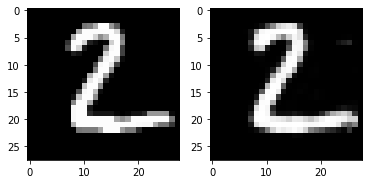

In [4]:
# Predict on test dataset.
predict_images = model.predict(test_images)

# Plot one input example and resulting prediction.
plt.subplot(1, 2, 1)
plt.imshow(test_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(1, 2, 2)
plt.imshow(predict_images[1], cmap=plt.get_cmap('gray'))
plt.show()


The next step is to apply our autoencoder to a different image. We use a different dataset known as Fashion MNIST. This dataset is designed to serve as a drop-in replacement for MNIST. It consists of the same number of training and test images, using the same 28×28 resolution. Just as for MNIST, each image belongs to one of ten classes. The difference compared to MNIST is that instead of depicting handwritten images, the images depict various pieces of clothing: dress, shirt, sneaker, and so on. The code snippet below loads this dataset and uses the trained model to try to reproduce the fashion MNIST test images.

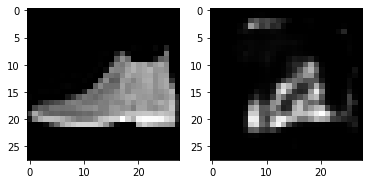

In [5]:
# Load Fashion MNIST.
f_mnist = keras.datasets.fashion_mnist
(f_train_images, f_train_labels), (f_test_images,
                        f_test_labels) = f_mnist.load_data()

f_train_images = f_train_images / 255.0
f_test_images = f_test_images / 255.0

# Predict and plot.
f_predict_images = model.predict(f_test_images)
plt.subplot(1, 2, 1)
plt.imshow(f_test_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(1, 2, 2)
plt.imshow(f_predict_images[0], cmap=plt.get_cmap('gray'))
plt.show()


The result should indicate that the autoencoder is not good at reproducing images that look vastly different from the MNIST images. To quantify this further, the code snippet below computes the mean absolute error for the autoencoder, both for all MNIST test examples and all Fashion MNIST test examples. We then plot the results. The resulting chart shows how the autoencoder can be used to identify images that look different than the ones in the training dataset.


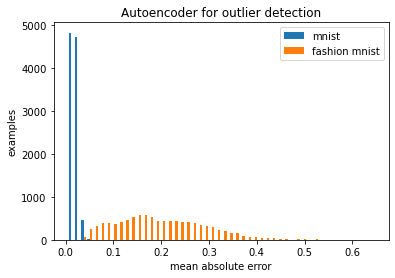

In [6]:
# Compute errors and plot.
error = np.mean(np.abs(test_images - predict_images), (1, 2))
f_error = np.mean(np.abs(f_test_images - f_predict_images), (1, 2))
_ = plt.hist((error, f_error), bins=50, label=['mnist',
                                               'fashion mnist'])
plt.legend()
plt.xlabel('mean absolute error')
plt.ylabel('examples')
plt.title("Autoencoder for outlier detection")
plt.show()


The chart indicates that there is some overlap between the two datasets in terms of resulting error. The code snippet below provides some insight into why this is the case by plotting the images with the highest error from the MNIST dataset. See the book for more details of the expected result.


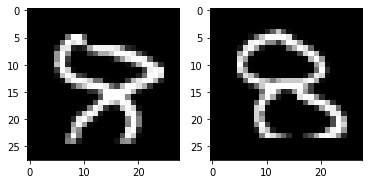

In [7]:
# Print outliers in mnist data.
index = error.argmax()
plt.subplot(1, 2, 1)
plt.imshow(test_images[index], cmap=plt.get_cmap('gray'))
error[index] = 0
index = error.argmax()
plt.subplot(1, 2, 2)
plt.imshow(test_images[index], cmap=plt.get_cmap('gray'))
plt.show()
